In [26]:
import pandas as pd
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
features = pd.read_csv("../data/feature_mat.csv")

In [4]:
classes = pd.read_csv("../data/pix_class.csv")

In [5]:
merged_features = pd.merge(features, classes, left_on="Unnamed: 0", right_on="fname")

In [6]:
del merged_features["Unnamed: 0_x"]
del merged_features["Unnamed: 0_y"]

In [ ]:
meta = pd.read_csv("../data/clean_data.csv")

for index, row in meta.iterrows():
        this_col = row['object_production_date_latest']
        if isinstance(this_col, str):
            if int(this_col) > 2019:
                print("to big")
                meta.at[index, 'object_production_date_latest'] = np.nan
                
                
# making af bin pr century
bins = [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2018]

group_names = ['1000-1100', '1100-1200','1200-1300','1300-1400', '1400-1500','1500-1600', '1600-1700','1700-1800', '1800-1900','1900-2000','2000-']
meta['object_production_date_latest-binned'] = pd.cut(meta['object_production_date_latest'], bins, labels=group_names, include_lowest=True)

meta[['object_production_date_latest','object_production_date_latest-binned']].head(20)

In [8]:
# Remove class tags
mat = merged_features.iloc[:,0:36]

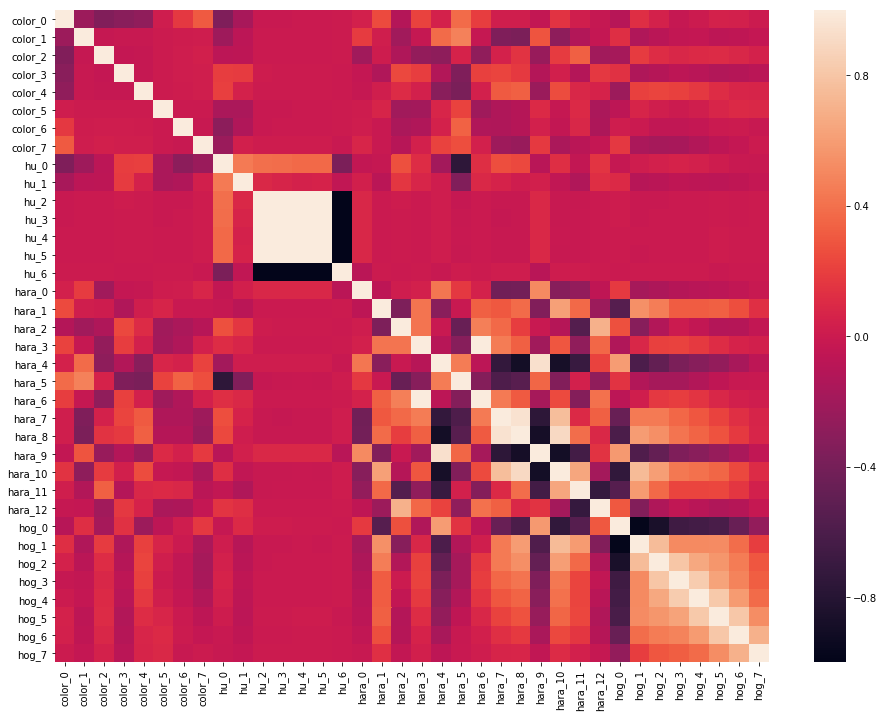

In [9]:
# Correlation heatmap
corr = mat.corr()
plt.figure(figsize = (16,12))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [42]:
# Create MinMaxScaler object to normalise matrix
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaled = scaler.fit_transform(mat)

In [43]:
# Train and test (scaled)
X_train, X_test, y_train, y_test = train_test_split(scaled, merged_features['pix_class'], test_size=0.2, random_state=69)  

In [44]:
# Multinomial NB 
NBmodel = MultinomialNB().fit(X_train, y_train)  

ValueError: Input X must be non-negative

In [45]:
# Predict using Multinomial NB
NBy_predict = NBmodel.predict(X_test)
print(classification_report(y_test,NBy_predict))
print("Confusion matrix \n\n", confusion_matrix(y_test, NBy_predict)) 

NameError: name 'NBmodel' is not defined

In [46]:
# Gaussian NB
GNBmodel = GaussianNB().fit(X_train, y_train)

In [47]:
# Predict using Gaussian NB
GNBy_predict = GNBmodel.predict(X_test)
print(classification_report(y_test, GNBy_predict))
print("Confusion matrix \n\n", confusion_matrix(y_test, GNBy_predict)) 

              precision    recall  f1-score   support

           0       0.26      0.26      0.26       826
           1       0.59      0.30      0.40       839
           2       0.29      0.04      0.07       547
           3       0.39      0.58      0.47       419
           4       0.31      0.56      0.40       824
           5       0.00      0.00      0.00       476
           6       0.23      0.84      0.37        55
           7       0.16      0.43      0.23       222
           8       0.34      0.58      0.43       468
           9       0.21      0.65      0.31       244
          10       0.60      0.96      0.74        53
          11       0.30      0.24      0.27       610
          12       0.60      0.01      0.02       600
          13       0.44      0.06      0.11       652
          14       0.40      0.77      0.53        77
          15       0.29      0.12      0.17       300
          16       0.48      0.54      0.51       794
          17       0.31    

In [48]:
# Logistic Regression model
LRmodel = LogisticRegression(verbose=True).fit(X_train, y_train) 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[LibLinear]

In [49]:
# Predict using Logistic Regression model
LRy_predict = LRmodel.predict(X_test)
print(classification_report(y_test,LRy_predict))
print("Confusion matrix \n\n", confusion_matrix(y_test, LRy_predict)) 

              precision    recall  f1-score   support

           0       0.35      0.35      0.35       826
           1       0.54      0.74      0.62       839
           2       0.33      0.14      0.20       547
           3       0.56      0.54      0.55       419
           4       0.44      0.54      0.49       824
           5       0.38      0.14      0.21       476
           6       0.80      0.64      0.71        55
           7       0.50      0.47      0.49       222
           8       0.59      0.50      0.54       468
           9       0.58      0.23      0.33       244
          10       0.61      0.87      0.72        53
          11       0.44      0.39      0.41       610
          12       0.40      0.47      0.43       600
          13       0.38      0.46      0.42       652
          14       0.76      0.58      0.66        77
          15       0.53      0.18      0.27       300
          16       0.53      0.68      0.60       794
          17       0.43    

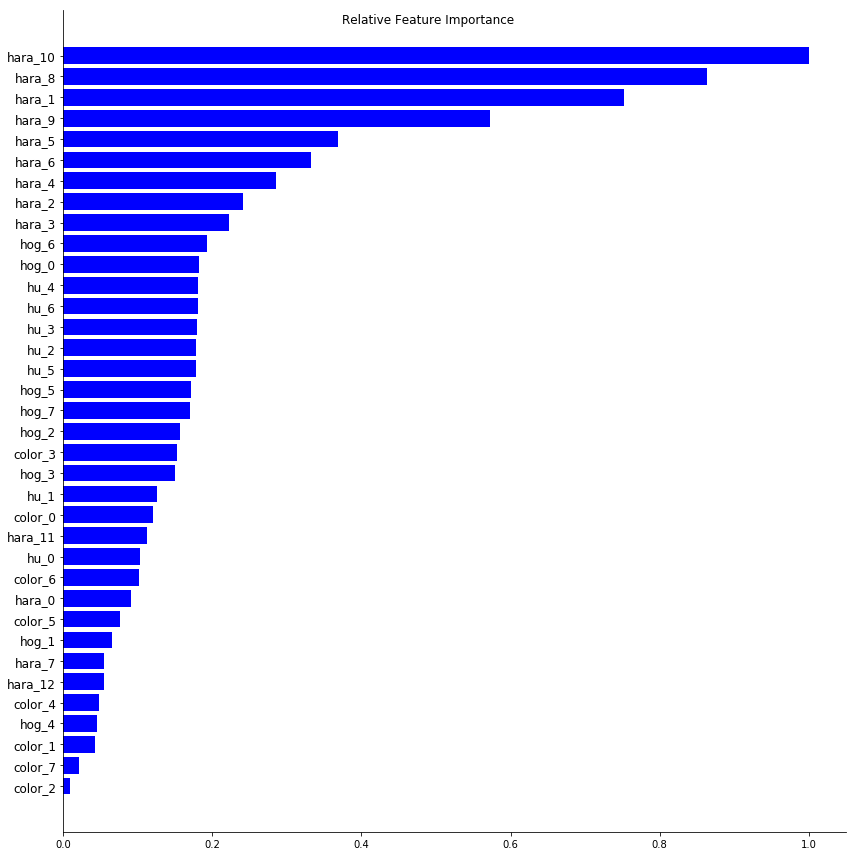

In [50]:
feature_importance = abs(LRmodel.coef_[0])
feature_importance = feature_importance / feature_importance.max()
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

colors = ['red' if c < 0 else 'blue' for c in feature_importance[sorted_idx]]

featfig = plt.figure()

featfig.set_size_inches(12, 12)
featax = featfig.add_subplot(1, 1, 1)
featfig.suptitle('Relative Feature Importance', fontsize=12)
featax.barh(pos, feature_importance[sorted_idx], align='center', color=colors)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(mat.columns)[sorted_idx], fontsize=12)
featax.spines['top'].set_visible(False)
featax.spines['right'].set_visible(False)

plt.tight_layout()   
#plt.savefig("../out/LRmodel_feature_importance.absolute.png")
plt.show()

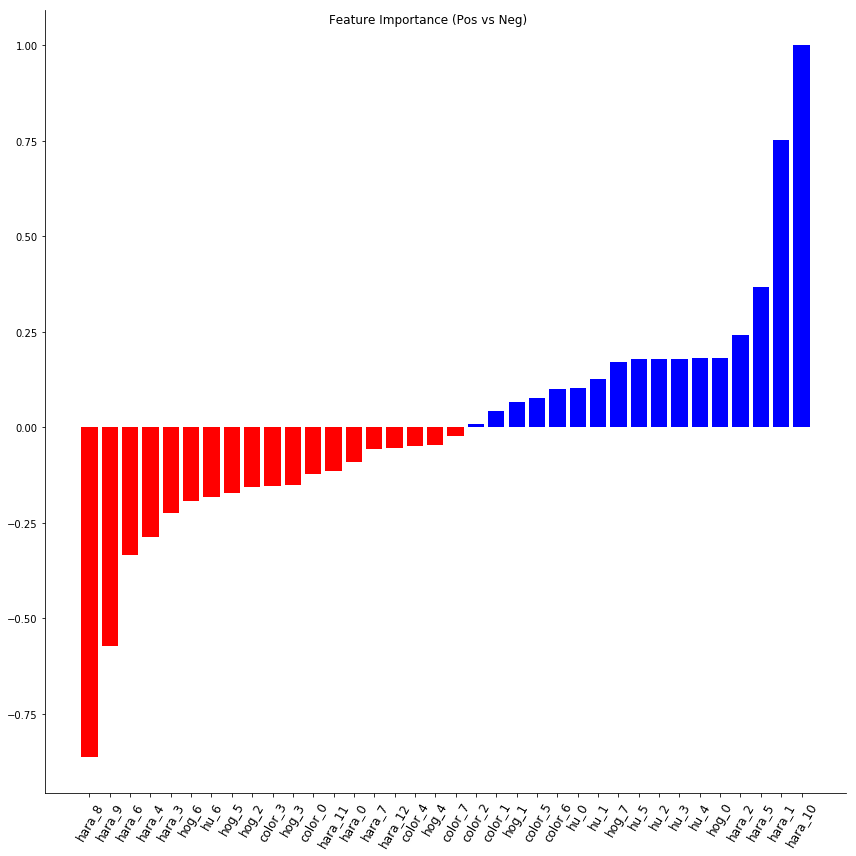

In [51]:
feature_importance = LRmodel.coef_[0]
feature_importance = feature_importance / feature_importance.max()
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])# + .5

colors = ['red' if c < 0 else 'blue' for c in feature_importance[sorted_idx]]

featfig = plt.figure()
featfig.suptitle('Feature Importance (Pos vs Neg)', fontsize=12)
featfig.set_size_inches(12, 12)
featax = featfig.add_subplot(1, 1, 1)

featax.bar(pos, feature_importance[sorted_idx], align='center', color=colors)
featax.set_xticks(pos)
featax.set_xticklabels(np.array(mat.columns)[sorted_idx], rotation=60, fontsize=12)
featax.spines['top'].set_visible(False)
featax.spines['right'].set_visible(False)

plt.tight_layout()   
#plt.savefig("../out/LRmodel_feature_importance.PosNeg.png")
plt.show()

In [52]:
# SVM Classifier
svclassifier = LinearSVC(verbose=True).fit(X_train, y_train)

[LibLinear]

In [53]:
# Predict using SVM model
SVy_pred = svclassifier.predict(X_test)    
print(classification_report(y_test,SVy_pred))  
print("Confusion matrix \n\n", confusion_matrix(y_test,SVy_pred))

              precision    recall  f1-score   support

           0       0.36      0.31      0.34       826
           1       0.52      0.81      0.63       839
           2       0.40      0.06      0.11       547
           3       0.56      0.60      0.58       419
           4       0.42      0.64      0.51       824
           5       0.46      0.07      0.12       476
           6       0.83      0.78      0.80        55
           7       0.60      0.35      0.44       222
           8       0.56      0.52      0.54       468
           9       0.64      0.20      0.31       244
          10       0.63      0.92      0.75        53
          11       0.43      0.34      0.38       610
          12       0.45      0.46      0.45       600
          13       0.38      0.45      0.41       652
          14       0.69      0.61      0.65        77
          15       0.55      0.14      0.22       300
          16       0.50      0.72      0.59       794
          17       0.43    

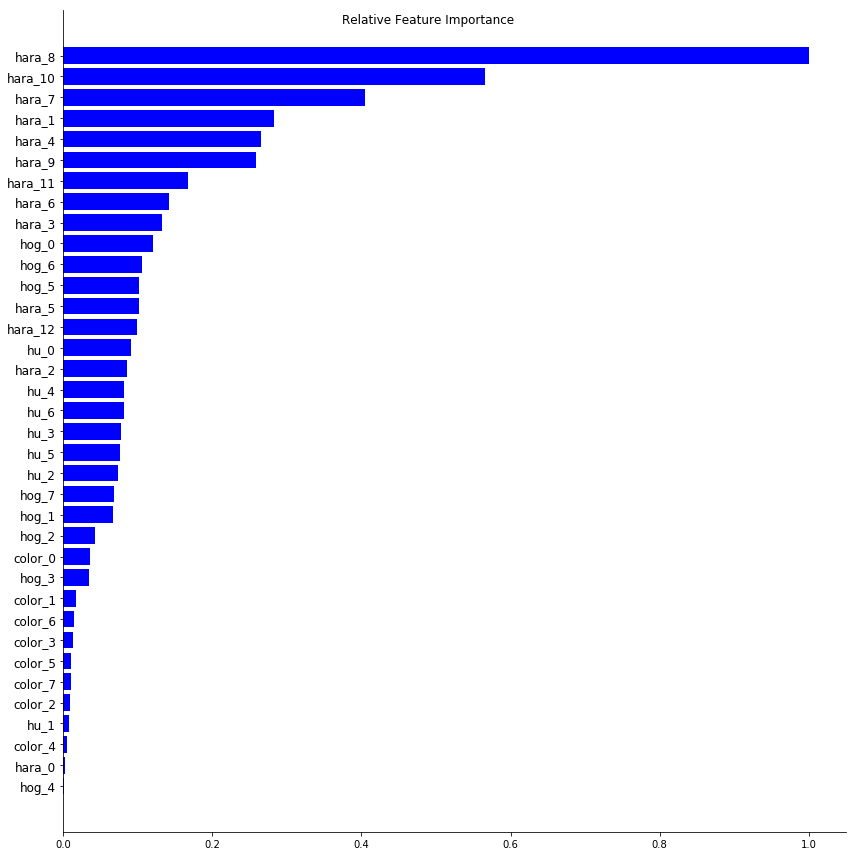

In [54]:
feature_importance = abs(svclassifier.coef_[0])
feature_importance = feature_importance / feature_importance.max()
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

colors = ['red' if c < 0 else 'blue' for c in feature_importance[sorted_idx]]

featfig = plt.figure()

featfig.set_size_inches(12, 12)
featax = featfig.add_subplot(1, 1, 1)
featfig.suptitle('Relative Feature Importance', fontsize=12)
featax.barh(pos, feature_importance[sorted_idx], align='center', color=colors)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(mat.columns)[sorted_idx], fontsize=12)
featax.spines['top'].set_visible(False)
featax.spines['right'].set_visible(False)

plt.tight_layout()   
#plt.savefig("../out/SVM_feature_importance.absolute.png")
plt.show()

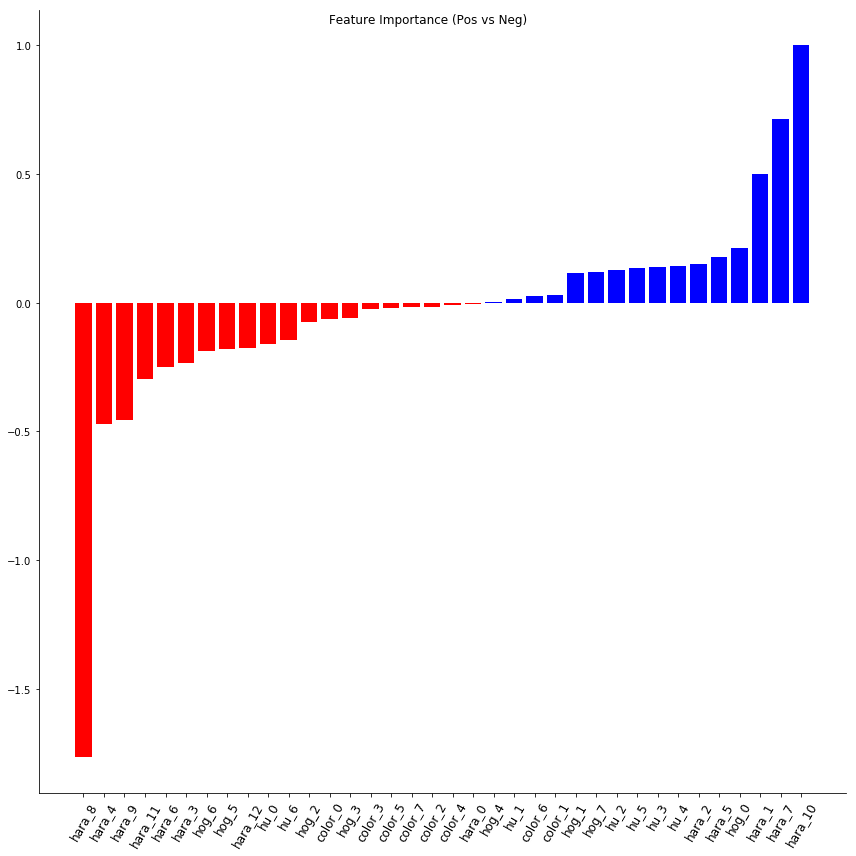

In [55]:
feature_importance = svclassifier.coef_[0]
feature_importance = feature_importance / feature_importance.max()
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])# + .5

colors = ['red' if c < 0 else 'blue' for c in feature_importance[sorted_idx]]

featfig = plt.figure()
featfig.suptitle('Feature Importance (Pos vs Neg)', fontsize=12)
featfig.set_size_inches(12, 12)
featax = featfig.add_subplot(1, 1, 1)

featax.bar(pos, feature_importance[sorted_idx], align='center', color=colors)
featax.set_xticks(pos)
featax.set_xticklabels(np.array(mat.columns)[sorted_idx], rotation=60, fontsize=12)
featax.spines['top'].set_visible(False)
featax.spines['right'].set_visible(False)

plt.tight_layout()   
#plt.savefig("../out/SVM_feature_importance.PosNeg.png")
plt.show()